 # # ****Taiwan 2020 Traffic Accident *(A2)***** # #
         (Ａ２類指造成人員受傷或超過二十四小時死亡之交通事故)

# 一、前言
> 本文為純粹學習之用途、粗糙的分析統計技巧以及有限但儘可能的篇幅，
> 就交通事故行做為分析，以提供個人在統計分析及技巧運用上粗略淺見，
> 歡迎各位的指點與指教，此資料也參照公開資訊站中資料，也謝謝此作者對資訊做整理及提供。

# 二、研究動機及目的
> 本身為機車族，也常再交通事故上目睹或聽聞事故發生，
> 為了了解在台灣中交通事故發生狀況，以此作為警惕，
> 呼籲大家凡行車皆要小心警覺，遵守交通規則保障你我安全。
> 而從資料中統計並分析，最後對資訊可以應用在哪裡或是產業做結論，
> 另也在Kaggle網站中看到此資料的提供，便為此資料開始做分析及交流。

# 三、研究方向及資料呈現
> 1. 各縣市持車量跟車禍事故的傷亡人數的比例
> 2. 每個月發生車禍事故的傷亡人數
> 3. 工作日(含補假日)、假日(含國定假日)及全年事故傷亡人數，平均出每日傷亡人數
> 4. 以每個時段(2小時為單位)的各縣市發生交通事故的傷亡人數
> 5. 以台灣地圖列出事故發生的位置

In [1]:
import pandas as pd
import datetime
import folium
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 本作者提供的資料(CSV檔)
> 資料內容：事故發生日期時間、事故發生地點、事故傷亡人數、事故車種、事故發生地點的經緯度

In [2]:
df = pd.read_csv("../input/traffic-data/109A2.csv", sep=',', header=0)
df

發生時間                        發生地點   死亡受傷人數  \
0       109年01月01日 00時00分56秒            桃園市中壢區高鐵南路與公園路路口  死亡0;受傷2   
1       109年01月01日 00時01分00秒      高雄市大樹區大坑路108之18號前0.0公尺  死亡0;受傷3   
2       109年01月01日 00時04分25秒       新竹市東區經國路口 / 新竹市東區水田街口  死亡0;受傷1   
3       109年01月01日 00時05分00秒               臺南市南區明興路1034號  死亡0;受傷1   
4       109年01月01日 00時06分00秒  桃園市平鎮區環南路2段口 / 桃園市平鎮區新富五街口  死亡0;受傷1   
...                      ...                         ...      ...   
335391  109年12月30日 10時33分00秒         新北市三重區新北市三重區重陽路與大智街  死亡0;受傷1   
335392  109年12月30日 11時20分00秒        新北市三重區新北市三重區中正南路與重安街  死亡0;受傷1   
335393  109年12月30日 13時11分00秒      新北市板橋區新北市板橋區大同街35巷與文聖街  死亡0;受傷1   
335394  109年12月30日 13時44分51秒              新竹縣竹北市中正東路487號  死亡0;受傷2   
335395  109年12月30日 17時09分51秒   新竹縣竹北市中華路口 / 新竹縣竹北市光明十四街口  死亡0;受傷1   

                            車種          經度         緯度  
0          自用-小客車;普通重型-機車;乘客-人  121.207980  25.005826  
1            普通重型-機車;乘客-人;乘客-人  120.439800  22.710880  
2               自用-小客車;普通重型-機車  120.965928  24.812959  
3               普通重型-機車;自用-小客車  120.183415  22.930683  
4                自用-小客車;自用-小客車  121.214405  24.940303  
...                        ...         ...        ...  
335391             行人-人;自用-小客車  121.486875  25.059188  
335392          普通重型-機車;人力車-慢車  121.492743  25.052300  
335393          自用-小客車;普通重型-機車  121.476771  25.028017  
335394     自用-小客車;普通重型-機車;乘客-人  121.006291  24.838117  
335395  普通重型-機車;自用-小貨車(含客、貨兩用)  121.001613  24.830625  

[335396 rows x 6 columns]

# 資料整理
> 欄位分開：發生日期分開為：日期、時間，並把單位換成符號；死亡受傷人數分開為：死數、傷數，並把數字部分給取出

In [3]:
df = pd.read_csv("../input/traffic-data/109A2.csv", sep=',', header=0)
df.loc[:, '發生時間'] = df['發生時間'].str.replace('年','-')
df.loc[:, '發生時間'] = df['發生時間'].str.replace('月','-')
df.loc[:, '發生時間'] = df['發生時間'].str.replace('日','')
df.loc[:, '發生時間'] = df['發生時間'].str.replace('時',':')
df.loc[:, '發生時間'] = df['發生時間'].str.replace('分',':')
df.loc[:, '發生時間'] = df['發生時間'].str.replace('秒','')
df.loc[:, '發生時間'] = df['發生時間'].str.replace('109','2020')

df.insert(0,'日期',df.loc[:,'發生時間'].str.replace('\s\d+\:\d+\:\d+','', regex=True))
df.loc[:, '發生時間'] = df['發生時間'].str.replace('\d+\-\d+\-\d+\s','', regex=True)

df.insert(3,'死數',df.loc[:,'死亡受傷人數'].str.replace('\;受傷\d','', regex=True))
df.loc[:, '死亡受傷人數'] = df['死亡受傷人數'].str.replace('死亡\d\;','', regex=True)

df.loc[:, '死數'] = df['死數'].str.replace('死亡','').astype('int32')
df.loc[:, '死亡受傷人數'] = df['死亡受傷人數'].str.replace('受傷','').astype('int32')

df = df.rename({"發生時間": "時間", "發生地點": "地點", "死亡受傷人數": "傷數"}, axis='columns')
df.set_index('日期', inplace=True)
df

時間                          地點  死數  傷數  \
日期                                                         
2020-01-01  00:00:56            桃園市中壢區高鐵南路與公園路路口   0   2   
2020-01-01  00:01:00      高雄市大樹區大坑路108之18號前0.0公尺   0   3   
2020-01-01  00:04:25       新竹市東區經國路口 / 新竹市東區水田街口   0   1   
2020-01-01  00:05:00               臺南市南區明興路1034號   0   1   
2020-01-01  00:06:00  桃園市平鎮區環南路2段口 / 桃園市平鎮區新富五街口   0   1   
...              ...                         ...  ..  ..   
2020-12-30  10:33:00         新北市三重區新北市三重區重陽路與大智街   0   1   
2020-12-30  11:20:00        新北市三重區新北市三重區中正南路與重安街   0   1   
2020-12-30  13:11:00      新北市板橋區新北市板橋區大同街35巷與文聖街   0   1   
2020-12-30  13:44:51              新竹縣竹北市中正東路487號   0   2   
2020-12-30  17:09:51   新竹縣竹北市中華路口 / 新竹縣竹北市光明十四街口   0   1   

                                車種          經度         緯度  
日期                                                         
2020-01-01     自用-小客車;普通重型-機車;乘客-人  121.207980  25.005826  
2020-01-01       普通重型-機車;乘客-人;乘客-人  120.439800  22.710880  
2020-01-01          自用-小客車;普通重型-機車  120.965928  24.812959  
2020-01-01          普通重型-機車;自用-小客車  120.183415  22.930683  
2020-01-01           自用-小客車;自用-小客車  121.214405  24.940303  
...                            ...         ...        ...  
2020-12-30             行人-人;自用-小客車  121.486875  25.059188  
2020-12-30          普通重型-機車;人力車-慢車  121.492743  25.052300  
2020-12-30          自用-小客車;普通重型-機車  121.476771  25.028017  
2020-12-30     自用-小客車;普通重型-機車;乘客-人  121.006291  24.838117  
2020-12-30  普通重型-機車;自用-小貨車(含客、貨兩用)  121.001613  24.830625  

[335396 rows x 7 columns]

# 各縣市持車量跟車禍事故的傷亡人數的比例
> 1. 目的：各縣市中持有車的人中有多少人，在持有車比率與發生車禍的比率，分開看這縣市是相對其它縣市的交通上安全性。
> 2. 方法：首先以城市為條件篩選出傷亡數，並在＂交通部公路總局統計查詢網＂中＂機動車輛登記數－按縣市別分＂的資料抓出各縣市的持車量，相除後轉換成百分比，最後依傷亡率做排序。
* 資料：[機動車輛登記數－按縣市別分 查詢](https://stat.thb.gov.tw/hb01/webMain.aspx?sys=210&kind=21&type=1&funid=1110009&rdm=jriWp6ci) ； [機動車輛登記數－按縣市別分](https://stat.thb.gov.tw/hb01/webMain.aspx?sys=220&ym=10900&ymt=10900&kind=21&type=1&funid=1110009&cycle=4&outmode=0&compmode=0&outkind=1&fld0=1&codspc0=1,4,7,1,10,1,13,16,&rdm=R77935)

In [4]:
cb = [3252789,1762194,2078361,2872294,2029219,2957466,436501,540347,548460,1327131,527778,715045,533264,917199,236560,328480,115794,284216,433284,274994,114647,10977]
cc = ['新北市','臺北市','桃園市','臺中市','臺南市','高雄市','宜蘭縣','新竹縣','苗栗縣','彰化縣','南投縣','雲林縣','嘉義縣','屏東縣','臺東縣','花蓮縣','澎湖縣','基隆市','新竹市','嘉義市','金門縣','連江縣']
car_hold = pd.DataFrame(cb, index=cc, columns=['持車量'])

index2 = sorted(list(set(df['地點'].str[:3])))
df2_die = []
df2_hurt = []
for i in index2:
    df2_die.append(df.loc[df['地點'].str.startswith(i), '死數'].sum())
    df2_hurt.append(df.loc[df['地點'].str.startswith(i), '傷數'].sum())
df2 = pd.DataFrame(df2_die, index = index2, columns=['死數'])
df2.loc[:, '傷數'] = df2_hurt
df2.loc[:, '傷數'] = df2_hurt
df2 = pd.merge(df2, car_hold, left_index=True, right_index=True)
df2.loc[:, '傷亡率'] = round(((df2['死數'] + df2['傷數']) / df2['持車量'])*100, 1).astype('str')+'%'
df2.sort_values("傷亡率",inplace=False)


死數     傷數      持車量   傷亡率
連江縣   0     54    10977  0.5%
金門縣   0   1126   114647  1.0%
嘉義市   0   3558   274994  1.3%
澎湖縣   0   1461   115794  1.3%
苗栗縣   0   8261   548460  1.5%
新北市   0  56310  3252789  1.7%
高雄市   0  52614  2957466  1.8%
嘉義縣   0   9701   533264  1.8%
臺中市   3  51210  2872294  1.8%
雲林縣   0  12658   715045  1.8%
臺東縣   0   4551   236560  1.9%
臺北市   6  33629  1762194  1.9%
南投縣   0   9929   527778  1.9%
彰化縣   0  26884  1327131  2.0%
基隆市   1   5645   284216  2.0%
臺南市   0  45633  2029219  2.2%
屏東縣   0  21525   917199  2.3%
花蓮縣   0   7778   328480  2.4%
宜蘭縣   0  10719   436501  2.5%
新竹縣   1  13785   540347  2.6%
新竹市   0  12316   433284  2.8%
桃園市   6  59465  2078361  2.9%

# 每個月發生車禍事故的傷亡人數
> 1. 目的：查看每個月中，有多少人因交通事故，造成多少人數的傷亡。
> 2. 方法：以月分為條件，篩選出傷亡數。

死數     傷數
Jan   3  41905
Feb   0  35676
Mar   3  37927
Apr   0  36327
May   0  38780
Jun   5  40828
Jul   3  41139
Aug   0  39057
Sep   0  38026
Oct   1  41189
Nov   0  44097
Dec   2  13861

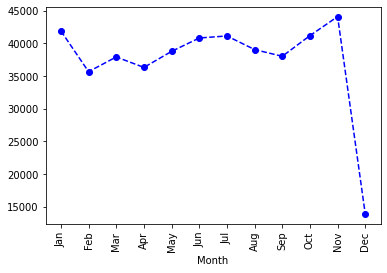

In [5]:
df3_die = []
df3_hurt = []
index3 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
zero = lambda x:i if len(str(i))==2 else '0' + str(i) 
for i in range(1,13):
    df3_die.append(df.loc[df.index.str.startswith('2020-'+ str(zero(i))), '死數'].sum())
    df3_hurt.append(df.loc[df.index.str.startswith('2020-'+ str(zero(i))), '傷數'].sum())
df3= pd.DataFrame(df3_die, index = index3, columns=['死數'])
df3.loc[:, '傷數'] = df3_hurt
df3

a = plt.plot(df3.index, df3.傷數, 'bo--')
a = plt.xlabel('Month') # 設定x軸標題
a = plt.xticks(df3.index, rotation='vertical') # 設定x軸label以及垂直顯示
plt.show()

# 工作日(含補假日)、假日(含國定假日)及全年事故傷亡人數，平均出每日傷亡人數
> 1. 目的：比對平日工作日跟休假日，發生交通事故的人數為多少，及全年中有多少人發生交通事故，平均出每日中會有多少人發生交通事故。
> 2. 方法：把2020的六日及國定假日挑出作為篩選條件，篩選傷亡人數，並把全年交通事故的傷亡人數算出，兩者做相減算出平日交通事故傷亡人數，最後把每項除上各天數，算出每日平均傷亡人數。
* 資料：[2020行事曆-人事行政總處109年行事曆](https://www.319papago.idv.tw/holiday/2020-hr/2020_HR.html)

In [6]:
#休息日計算
national_holiday = ['0123','0124','0125','0126','0127','0128','0129','0228','0229','0301','0402','0403','0404','0405','0501','0502','0503','0625','0626','0627','0628','1001','1002','1003','1004','1009','1010','1011']
make_up = ['0215','0620','0926']

start = datetime.datetime.strptime('2020-01-01', '%Y-%m-%d')
holiday_day = []
yearday_count = 0
while start <= datetime.datetime.strptime('2020-12-31', '%Y-%m-%d'):
    if start.date().weekday() == 5 or start.date().weekday() ==6:
        holiday_day.append(str(start.date()))
    start += datetime.timedelta(days=1)
    yearday_count += 1
#print(holiday_day)
holiday_caraccident = 0
for i in holiday_day:
    holiday_caraccident += df.loc[df.index.str.startswith(i), '傷數'].sum()
    holiday_caraccident += df.loc[df.index.str.startswith(i), '死數'].sum()
totle_caraccident = df.loc[:, '傷數'].sum() +df.loc[:, '死數'].sum()
work_caraccident = totle_caraccident - holiday_caraccident

df4 = pd.DataFrame({'傷亡數':[holiday_caraccident,work_caraccident,totle_caraccident],
                    '天數':[len(holiday_day),yearday_count-len(holiday_day),yearday_count],
                    '日均傷亡':[round(holiday_caraccident/len(holiday_day)),
                            round(work_caraccident/(yearday_count-len(holiday_day))),
                            round(totle_caraccident/yearday_count)]}
                ,index=['假日','平日','全年'])
df4

傷亡數   天數  日均傷亡
假日  112965  104  1086
平日  335864  262  1282
全年  448829  366  1226

# 以每個時段(2小時為單位)的各縣市發生交通事故的傷亡人數
> 1. 目的：對於每個時段間，觀察哪些時段哪些縣市最常發生事故機率最高，可判斷出那些時段車流量可能比較高，也可做出哪個時段及時間可晚點或早點出門判斷，或可安排員警指揮交通等判斷，以避免高機率交通事故的可能性。
> 2. 方法：以小時篩及每個縣市為條件篩選出傷亡人數作總和，在用for迴圈間隔2次循環，做出每兩小時為單位的效果，並用縣市當首時段在內的巢狀迴圈，逐一放入dict中後，做成DataFrame表格。

In [7]:
a = ['00:','01:','02:','03:','04:','05:','06:','07:','08:','09:','10:','11:','12:','13:','14:','15:','16:','17:','18:','19:','20:','21:','22:','23:']
time_period = []
for i in range(0,len(a),2):
    b = df.loc[df['時間'].str.startswith(a[i]), '傷數'].sum() + df.loc[df['時間'].str.startswith(a[i]), '死數'].sum()
    c = df.loc[df['時間'].str.startswith(a[i+1]), '傷數'].sum() + df.loc[df['時間'].str.startswith(a[i+1]), '死數'].sum()
    time_period.append(b + c)

a = ['00:','01:','02:','03:','04:','05:','06:','07:','08:','09:','10:','11:','12:','13:','14:','15:','16:','17:','18:','19:','20:','21:','22:','23:']
cc = ['新北市','臺北市','桃園市','臺中市','臺南市','高雄市','宜蘭縣','新竹縣','苗栗縣','彰化縣','南投縣','雲林縣','嘉義縣','屏東縣','臺東縣','花蓮縣','澎湖縣','基隆市','新竹市','嘉義市','金門縣','連江縣']
dict = {}
def query_mydata(df,i,j):
    return df['時間'].str.startswith(j) & df['地點'].str.startswith(i)
for i in cc:
    time_period2 = []
    for j in range(0,len(a),2):
        b = df.loc[query_mydata(df,i,a[j]), '傷數'].sum() + df.loc[query_mydata(df,i,a[j]), '死數'].sum()
        c = df.loc[query_mydata(df,i,a[j+1]), '傷數'].sum() + df.loc[query_mydata(df,i,a[j+1]), '死數'].sum()
        time_period2.append(b + c)
    dict[i] = time_period2
dict["總傷亡數"] = time_period
df5 = pd.DataFrame(dict, index=[['0-2時','2-4時','4-6時','6-8時','8-10時','10-12時','12-14時','14-16時','16-18時','18-20時','20-22時','22-0時']])
pd.set_option('display.max_colwidth',30)
df5

新北市   臺北市   桃園市   臺中市   臺南市   高雄市   宜蘭縣   新竹縣   苗栗縣   彰化縣  ...   屏東縣  \
0-2時    1311   845  1027   797   771   866   145   155   113   324  ...   325   
2-4時     578   304   448   322   322   364    77    85    66   144  ...   171   
4-6時     731   409   724   509   498   564   152   142   103   352  ...   249   
6-8時    5274  2317  7122  5436  5224  5675  1122  1709  1027  3404  ...  2113   
8-10時   7960  5267  8211  6679  5919  7047  1451  2193  1019  3561  ...  2691   
10-12時  6026  3752  6307  5827  5386  6415  1396  1501  1027  3222  ...  2913   
12-14時  5963  3670  5975  5471  4816  5589  1284  1285   824  2839  ...  2336   
14-16時  5630  3565  5791  5350  4868  5790  1202  1355   833  2864  ...  2336   
16-18時  7433  4343  8800  8172  7276  8165  1789  2154  1394  4578  ...  3544   
18-20時  6917  4153  7338  6285  5385  6177  1112  1756  1024  3049  ...  2535   
20-22時  4869  2787  4874  4079  3364  3765   641   971   545  1707  ...  1458   
22-0時   3618  2223  2854  2286  1804  2197   348   480   286   840  ...   854   

        臺東縣   花蓮縣  澎湖縣  基隆市   新竹市  嘉義市  金門縣  連江縣   總傷亡數  
0-2時     64    84   29  121   205   62   20    0   7728  
2-4時     36    45   19   62    92   46    4    1   3432  
4-6時     72    98   19  102    97   48    9    1   5327  
6-8時    395   711  124  533  1191  355  106    4  47520  
8-10時   551   995  145  674  1943  444  126    6  60998  
10-12時  638  1025  201  665  1380  488  129    2  52525  
12-14時  583  1023  187  605  1417  536  161    4  48187  
14-16時  578   899  184  522  1162  401  142   12  47124  
16-18時  737  1267  251  849  1722  515  189   21  68517  
18-20時  488   875  174  686  1623  317  151    1  53608  
20-22時  263   486   89  508   977  216   62    0  33546  
22-0時   146   270   39  319   507  130   27    2  20317  

[12 rows x 23 columns]

# 以台灣地圖列出事故發生的位置
> 1. 目的：可以較清楚快速的看出哪些區域事故發生率較高較密集。
> 2. 方法：用folium套件找出台灣地圖，並用資料提供的經緯度，利用迴圈方式在地圖上畫出圓點後顯示。
* **(※因為位置過多負擔過大此資料挑前5000筆)**

In [8]:
mount_map = folium.Map([23.6, 120.9], zoom_start=7.7, tiles='CartoDB positron', width=500)

for i in range(5000):#len(df['緯度'].values)): 
    a = folium.Circle(location=[df['緯度'][i],df['經度'][i]]).add_to(mount_map)
mount_map

# 四、結論
> 
* 從議題一持車量跟車禍事故的死傷人數的比例，是否可以對保險業中，保險商品做為計算指標。
* 從議題二每個月發生車禍的資料中，是否可以做為醫療業對於每月中，去準備醫療物資等分配。
* 從議題三工作日、假日、每日平均交通事故，是否可以做為個人行程上的安排。
* 從議題四資料各時段縣市發生傷亡數的資料中，是否可以對交通警員判斷出，工作上的安排與人員控管。
* 而最後一筆地圖也可以很直觀的看出，事故發生聚集位置，那對公共建設是否也是個參考依據。
* 以數據做觀察、以數據來管理、以數據去執行、並用數據建立流程是最客觀的，當沒有東西去做比對的話，更多的只是以感覺、經驗，而可能無法作出更好判斷。從以上數據呈現了出來的資料，並不只是看個結果，而更多的是從結果來去看原來，原來是這樣那我們就可以那樣執行，觀察中判斷，判斷中執行，在從執行中觀察。